In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_score
import pickle

In [3]:
data = pd.read_csv("D:\Kishanth\Guvi Project\Swiggy_Recommendation_System\swiggy.csv")
data.head(10)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
5,158204,Sam Uncle,Abohar,3.6,20+ ratings,₹ 200,Continental,22119652000052,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh...",Menu/158204.json
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,₹ 150,North Indian,22120652000021,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve...",Menu/156588.json
7,244866,Shri Balaji Vaishno Dhaba,Abohar,--,Too Few Ratings,₹ 100,North Indian,22119652000389,https://www.swiggy.com/restaurants/shri-balaji...,"Shri Balaji Vaishno Dhaba, St no 13,6th chowk,...",Menu/244866.json
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,₹ 100,"Snacks,Chaat",22119652000042,https://www.swiggy.com/restaurants/hinglaj-kac...,"Hinglaj Kachori Bhandhar, street no 11 circula...",Menu/156602.json
9,158193,yummy hub,Abohar,--,Too Few Ratings,₹ 200,Indian,22119652000045,https://www.swiggy.com/restaurants/yummy-hub-c...,"yummy hub, hanumangarh road near dr naveen set...",Menu/158193.json


In [4]:
data.shape

(148541, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [8]:
data[data.name.isnull()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...
137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


In [9]:
data.dropna(subset=["name"],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
data

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148450,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148451,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148452,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148453,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [10]:
df = data[["name","city","rating","rating_count","cost","cuisine","link","address"]]
df

,name,city,rating,rating_count,cost,cuisine,link,address
0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...,...
148450,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga..."
148451,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148452,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148453,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [11]:
# Treating Columns
# String Columns

df[["name","city","cuisine","link","address"]] = df[["name","city","cuisine","link","address"]].astype(str)

In [12]:
# Rating Column

df["rating"] = pd.to_numeric(df["rating"],errors="coerce")
df["rating"] = df["rating"].astype(float)
df.rating.fillna(df.rating.mean().round(1),inplace=True)
df.head(3)

,name,city,rating,rating_count,cost,cuisine,link,address
0,AB FOODS POINT,Abohar,3.9,Too Few Ratings,₹ 200,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"


In [14]:
# Rating_count Column

rating_ranges = {
    "Too Few Ratings": (1, 20),
    "20+ ratings": (21, 50),
    "50+ ratings": (51, 100),
    "100+ ratings": (101, 500),
    "500+ ratings": (500, 1000),
    "1K+ ratings": (1001, 5000),
    "5K+ ratings": (5001, 10000),
    "10K+ ratings": (10001, 15000)
}

def generate_random_rating(rating_category):
    low, high = rating_ranges[rating_category]
    return np.random.randint(low, high + 1)

df["rating_count"] = df["rating_count"].apply(generate_random_rating)

In [15]:
# Cost Column

df["cost"] = df["cost"].str.replace("₹ ","")
df["cost"]=pd.to_numeric(df["cost"],errors="coerce")
df["cost"].fillna(df["cost"].mean().round(1),inplace=True)

### These are the cuisine values that are not related
"Use Code JUMBO30 to avail","Attractive Combos Available","Code valid on bill over Rs.99","MAX 2 Combos per Order!","Use code XPRESS121 to avail.",
 "Default","8:15 To 11:30 Pm","Free Delivery ! Limited Stocks!","Discount offer from Garden Cafe Express Kankurgachi","Special Discount from (Hotel Swagath)",
 "SpecialDiscountfrom(HotelSwagath)","nan"

In [16]:
# Cuisine Column

df["cuisine"] = df["cuisine"].replace(["Use Code JUMBO30 to avail","Attractive Combos Available","Code valid on bill over Rs.99","MAX 2 Combos per Order!","Use code XPRESS121 to avail.",
 "Default","8:15 To 11:30 Pm","Free Delivery ! Limited Stocks!","Discount offer from Garden Cafe Express Kankurgachi","Special Discount from (Hotel Swagath)",
 "SpecialDiscountfrom(HotelSwagath)","nan"],"Unknown")

In [17]:
# Creating Cleaned DataFrame

cleaned_df = df.loc[:,["name","city","cuisine","rating","rating_count","cost","link","address"]]
cleaned_df.head(5)

,name,city,cuisine,rating,rating_count,cost,link,address
0,AB FOODS POINT,Abohar,"Beverages,Pizzas",3.9,11,200.0,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,"Sweets,Bakery",4.4,82,200.0,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,Beverages,3.8,424,100.0,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,Singh Hut,Abohar,"Fast Food,Indian",3.7,33,250.0,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,GRILL MASTERS,Abohar,"Italian-American,Fast Food",3.9,6,250.0,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."


In [19]:
# Cross-verifing null values

cleaned_df.isnull().sum()

name            0
city            0
cuisine         0
rating          0
rating_count    0
cost            0
link            0
address         0
dtype: int64

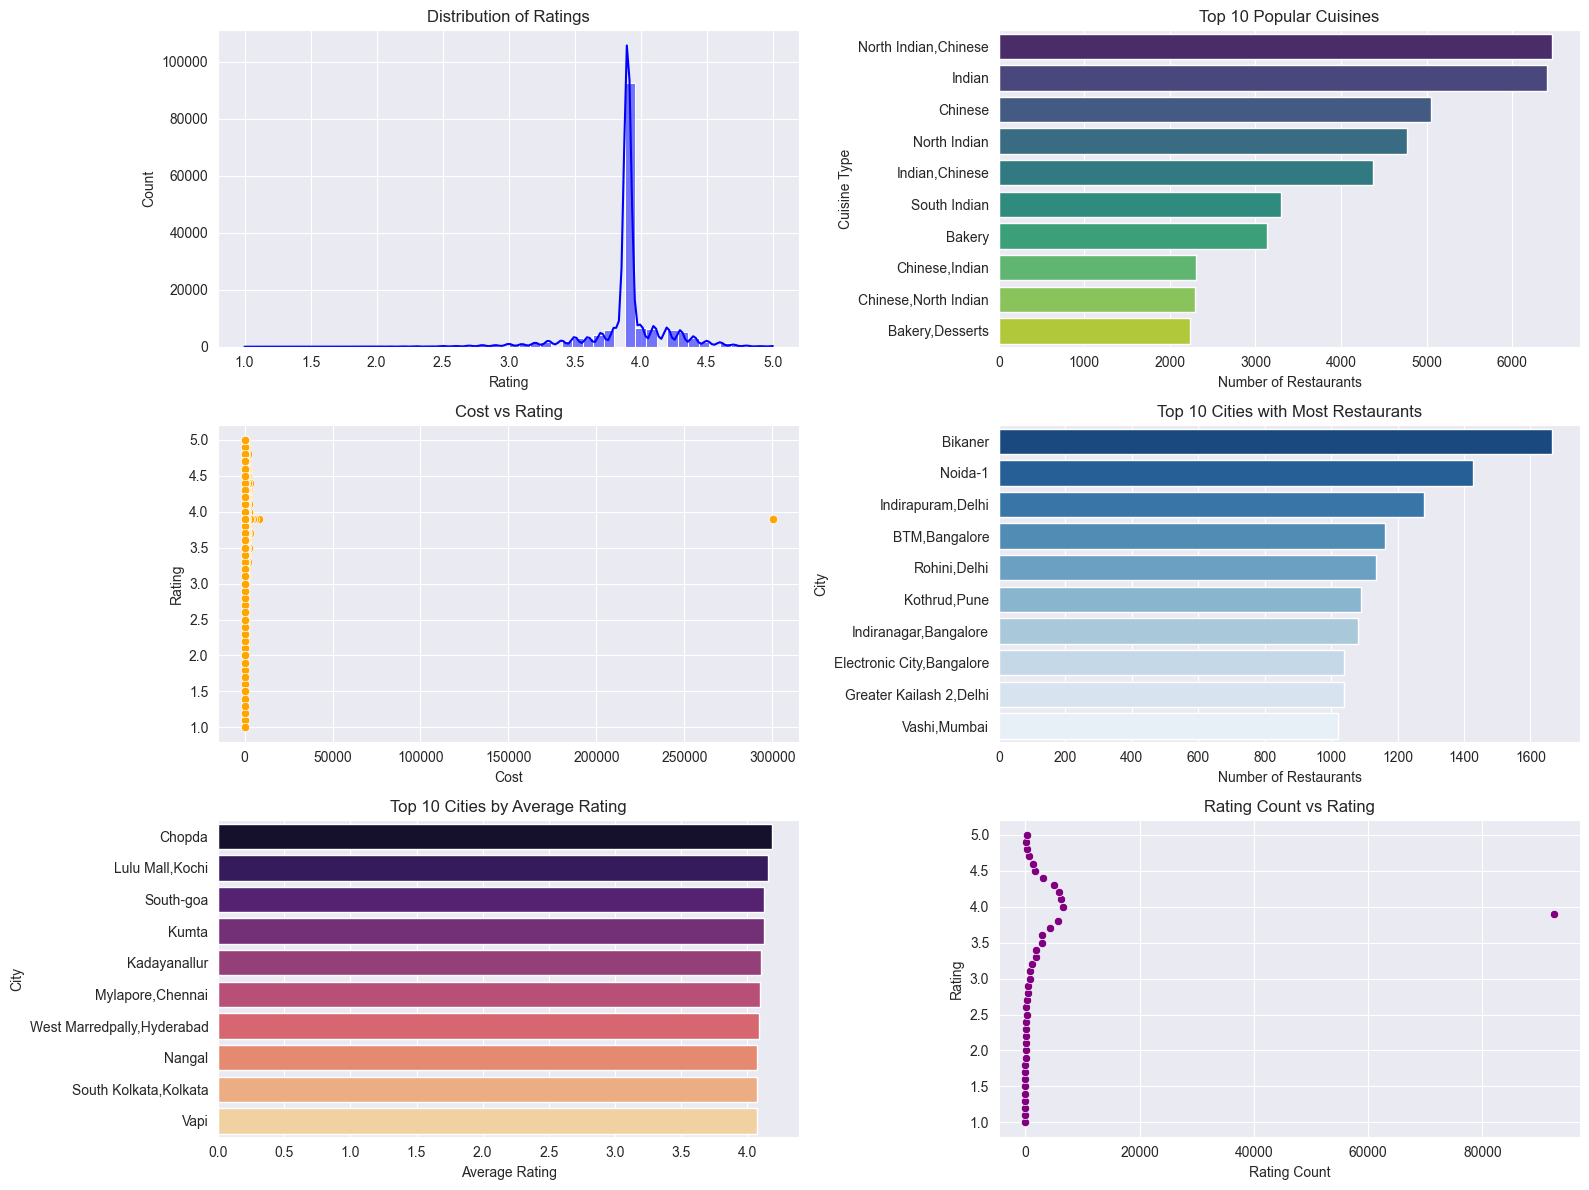

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("darkgrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

### 1. Distribution of Ratings ###
sns.histplot(cleaned_df["rating"], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Ratings")
axes[0, 0].set_xlabel("Rating")
axes[0, 0].set_ylabel("Count")

### 2. Top 10 Popular Cuisines ###
top_cuisines = cleaned_df["cuisine"].value_counts().head(10)
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Top 10 Popular Cuisines")
axes[0, 1].set_xlabel("Number of Restaurants")
axes[0, 1].set_ylabel("Cuisine Type")

### 3. Cost vs Rating Scatter Plot ###
sns.scatterplot(x=cleaned_df["cost"], y=cleaned_df["rating"], ax=axes[1, 0], color="orange", edgecolor="w")
axes[1, 0].set_title("Cost vs Rating")
axes[1, 0].set_xlabel("Cost")
axes[1, 0].set_ylabel("Rating")

### 4. Top 10 Cities with Most Restaurants ###
top_cities = cleaned_df["city"].value_counts().head(10)
sns.barplot(y=top_cities.index, x=top_cities.values, ax=axes[1, 1], palette="Blues_r")
axes[1, 1].set_title("Top 10 Cities with Most Restaurants")
axes[1, 1].set_xlabel("Number of Restaurants")
axes[1, 1].set_ylabel("City")

### 5. Top 10 Cities by Average Rating ###
city_avg_rating = cleaned_df.groupby("city")["rating"].mean().sort_values(ascending=False).head(10)
sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, ax=axes[2, 0], palette="magma")
axes[2, 0].set_title("Top 10 Cities by Average Rating")
axes[2, 0].set_xlabel("Average Rating")
axes[2, 0].set_ylabel("City")

### 6. Rating Count vs Rating ###
rating_count = cleaned_df.groupby("rating")["rating"].count()
sns.scatterplot(x=rating_count.values, y=rating_count.index, ax=axes[2, 1], color="purple")
axes[2, 1].set_title("Rating Count vs Rating")
axes[2, 1].set_xlabel("Rating Count")
axes[2, 1].set_ylabel("Rating")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [21]:
# Creating Cleaned_df CSV file

cleaned_df.to_csv("D:\Kishanth\Guvi Project\Swiggy_Recommendation_System\cleaned_csv.csv")

In [22]:
# Initialize Categorical Encoders

city_encoder = OneHotEncoder(sparse_output=False)
name_encoder = LabelEncoder()
cuisine_encoder = LabelEncoder()

# Standardize numerical features

rating_scaler = StandardScaler()
cost_scaler = StandardScaler()

In [23]:
# One-Hot Encoding for city

city_encoded = city_encoder.fit_transform(cleaned_df[["city"]])
city_encoded_df = pd.DataFrame(city_encoded, columns=city_encoder.get_feature_names_out(["city"])) # Convert to DataFrames

# Label Encoding for name and cuisine

cleaned_df["name_encoded"] = name_encoder.fit_transform(cleaned_df["name"])
cleaned_df["cuisine_encoded"] = cuisine_encoder.fit_transform(cleaned_df["cuisine"])

# Apply StandardScaler separately

cleaned_df["rating_scaled"] = rating_scaler.fit_transform(cleaned_df[["rating"]])
cleaned_df["cost_scaled"] = cost_scaler.fit_transform(cleaned_df[["cost"]])

In [24]:
# Combine all encoded and scaled features

encoded_data = pd.concat([
    cleaned_df.drop(["city", "name", "cuisine", "rating", "cost","link","address","rating_count"], axis=1),
    city_encoded_df
], axis=1)

In [25]:
# Save the encoded dataset as CSV file

encoded_data.to_csv("D:\Kishanth\Guvi Project\Swiggy_Recommendation_System\encoded_data.csv", index=True)

In [26]:
# Save the encoders and scaler as a pickle file

with open("D:\Kishanth\Guvi Project\Swiggy_Recommendation_System\encoder.pkl", "wb") as f:
    pickle.dump({
        "city_encoder": city_encoder,
        "name_encoder": name_encoder,
        "cuisine_encoder": cuisine_encoder,
        "rating_scaler": rating_scaler,
        "cost_scaler": cost_scaler
    }, f)

In [27]:
# Input Features

X = encoded_data.drop(columns=["name_encoded"], errors="ignore")

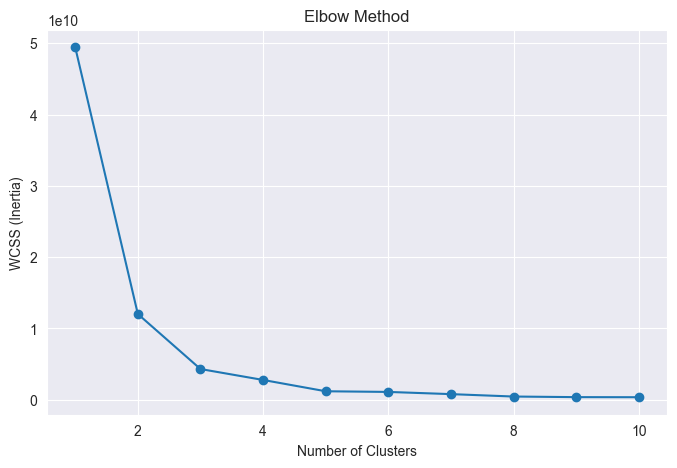

In [37]:
# Visualize the optimal number of clusters using Elbow Method

wcss = []
for i in range(1,11):
    kmeans_temp = KMeans(n_clusters=i, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [43]:
# Model and Training

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [38]:
# Save the KMeans model

with open("D:\Kishanth\Guvi Project\Swiggy_Recommendation_System\kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [44]:
# Metrics - Silhouette Score

y_pred = kmeans.labels_

sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score : {sil_score:.4f}")

Silhouette Score : 0.6963


A Silhouette Score of 0.6963 indicates that your K-Means clustering model is performing well with a good balance between cohesion (how close data points are within the same cluster) and separation (how far clusters are from each other).